In [69]:
import csv
import math
import networkx as net
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite as bi

In [29]:
r = csv.reader(open('../../SNABook/chapter5/campaign_short.csv'))

In [15]:
g = net.Graph()

In [30]:
pacs = []
candidates = []

for row in  r:
    if row[0] not in pacs:
        pacs.append(row[0])
    if row[12] not in candidates:
        candidates.append(row[12])
    g.add_edge(row[0],row[12],weight=int(row[10]))

In [51]:
net.edges(g)

EdgeView([('C00000042', 'S4MO00037'), ('C00000042', 'H6IL14095'), ('C00000042', 'H6IL06026'), ('C00000042', 'H8IL10016'), ('C00000042', 'H0IL10120'), ('C00000042', 'H8CT05104'), ('C00000042', 'H2IL01042'), ('C00000042', 'H0IL15061'), ('C00000042', 'S4MI00165'), ('C00000042', 'H6IL17106'), ('C00000042', 'H2WI05150'), ('C00000042', 'H0OH08029'), ('C00000042', 'H8WI00026'), ('C00000042', 'H4PA13066'), ('C00000042', 'H0MD08021'), ('C00000042', 'H6KY03090'), ('C00000042', 'H0MT00033'), ('C00000042', 'H8NY27077'), ('C00000042', 'H8WI09050'), ('C00000042', 'H2SC05052'), ('C00000042', 'H8IL13069'), ('C00000042', 'S8RI00102'), ('C00000042', 'H0ND00101'), ('C00000042', 'H4MD02059'), ('C00000042', 'H8NJ06118'), ('C00000042', 'S0WA00019'), ('C00000042', 'H0NY01095'), ('C00000042', 'H4MN01070'), ('C00000042', 'H8KY00035'), ('C00000042', 'S8FL00075'), ('C00000042', 'H0IA02040'), ('C00000042', 'H8WI01024'), ('C00000042', 'H0VA02035'), ('C00000042', 'H2IL20042'), ('S4MO00037', 'C00000059'), ('S4MO0003

In [40]:
pacnet = bi.weighted_projected_graph(g, pacs, ratio=False)


In [63]:
pacnet = [pacnet.subgraph(c).copy() for c in net.connected_components(pacnet)][0]


<generator object connected_components at 0x15bf985e0>

In [64]:
weights = [math.log(edata['weight']) for f,t,edata in pacnet.edges(data=True)]

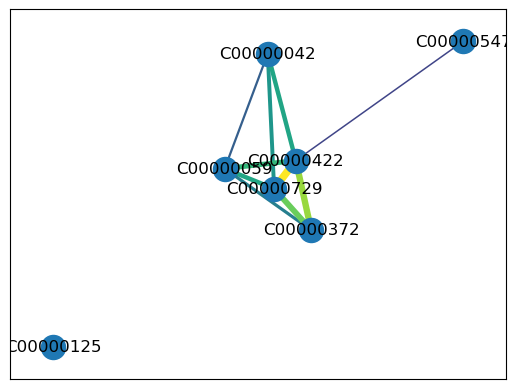

In [65]:
net.draw_networkx(pacnet, width=weights,edge_color=weights)

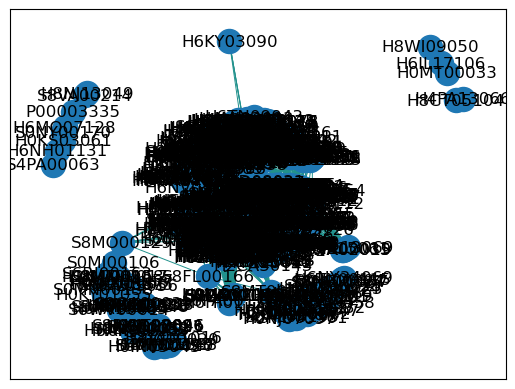

In [66]:
cannet = bi.weighted_projected_graph(g,candidates,ratio=False)
cannet = [cannet.subgraph(c).copy() for c in net.connected_components(cannet)][0]
weights = [math.log(edata['weight']) for f,t,edata in cannet.edges(data=True)]
net.draw_networkx(cannet, width=weights,edge_color=weights)

In [86]:
def trim_edges(g,weight=1):
    g2 = net.Graph()
    for f, to, edata in g.edges(data=True):
        #print(f,to,edata)
        if edata['weight'] > weight:
            #pass
            g2.add_edge(f,to,weight=edata['weight'])

    return g2

NameError: name 'f' is not defined

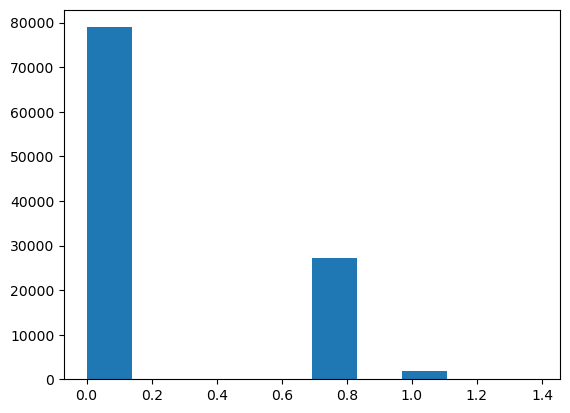

In [71]:
plt.hist(weights)
plt.show()

In [87]:
cannet_trim = trim_edges(cannet,weight=math.exp(0.9))

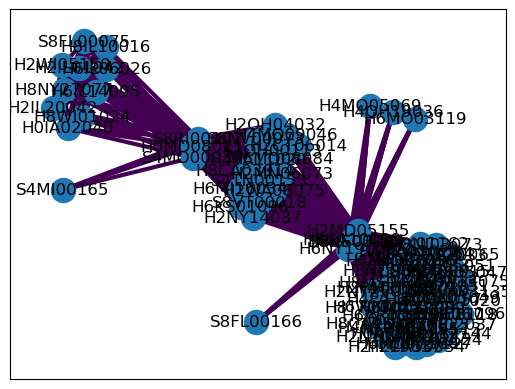

In [88]:
weights = [edata['weight'] for f,t,edata in cannet_trim.edges(data=True)]
net.draw_networkx(cannet_trim,width=weights,edge_color=weights)